# Titanic Data

In [2]:
# For data manipulation and visualization
import numpy as np
import pandas as pd
# import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

# For predictive data analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve 

 # **Loading Train and Test Datasets**<a id="data"></a>

In [3]:
train = pd.read_csv(r"C:/Users/Saad/Downloads/Titanic_Files/train.csv")

In [16]:
test = pd.read_csv(r"C:/Users/Saad/Downloads/Titanic_Files/test.csv")

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [19]:
train.shape

(891, 12)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
train.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


### Check for duplicate rows and delete

In [23]:
train.duplicated().sum()

0

### Null value

In [24]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Missing value filling

In [32]:
def missing (train):
    missing_number = train.isnull().sum().sort_values(ascending=False)
#     print(missing_number)
    missing_percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
#     print(missing_percent)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [33]:
missing(train)

,Missing_Number,Missing_Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [34]:
missing(test)

,Missing_Number,Missing_Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000


In [37]:
#fill null values with mean,median ,mode
for i in train.columns:
    if train[i].dtypes == 'object':
        train[i].fillna(train[i].mode()[0], inplace=True)
    else:
        train[i].fillna(train[i].median(), inplace=True)
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [38]:
#fill null values with mean,median ,mode
for i in test.columns:
    if test[i].dtypes == 'object':
        test[i].fillna(test[i].mode()[0], inplace=True)
    else:
        test[i].fillna(test[i].median(), inplace=True)
print(test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare  \
0      male  34.5      0      0              3

In [39]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [40]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

C:\Users\Saad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


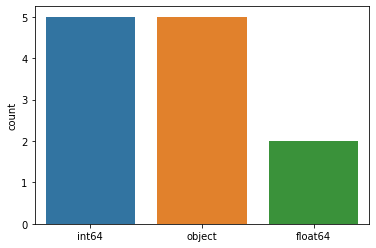

In [41]:
sns.countplot(train.dtypes.map(str))
plt.show()

C:\Users\Saad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


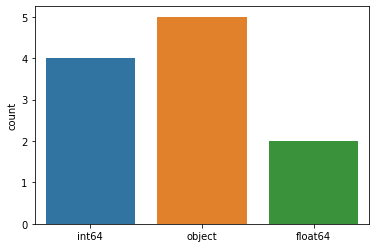

In [42]:
sns.countplot(test.dtypes.map(str))
plt.show()

In [43]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
for i in train.columns:
    print('colum_name',i)
    print('unique',train[i].unique())
    print('\n')

colum_name PassengerId
unique [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 

In [46]:
train["Cabin"].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [47]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [48]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [49]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [50]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


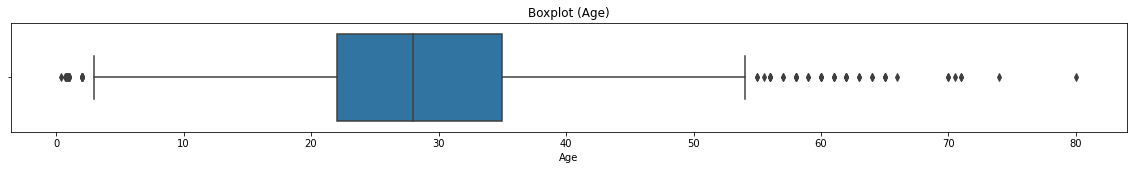

In [51]:
plt.figure(figsize = (20,2))
sns.boxplot(x = "Age", data = train)
plt.title("Boxplot (Age)")
plt.show()

In [52]:
!pip install autoviz

     -------------------------------------- 62.3/62.3 kB 369.1 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 2.0 MB/s eta 0:00:00
     -------------------------------------- 140.6/140.6 kB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 3.1/3.1 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 12.9/12.9 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 125.4/125.4 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 4.3/4.3 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 40.8/40.8 kB 649.1 kB/s eta 0:00:00
     -------------------------------------- 233.7/

Shape of your Data Set loaded: (891, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    12 Predictors classified...
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3
Could not draw wordcloud plot for Name
Could not draw wordcloud plot for Ticket
Could not draw wordcloud plot for Cabin
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


<Figure size 720x360 with 0 Axes>

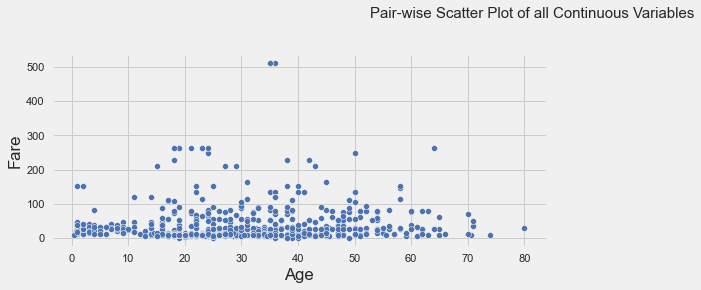

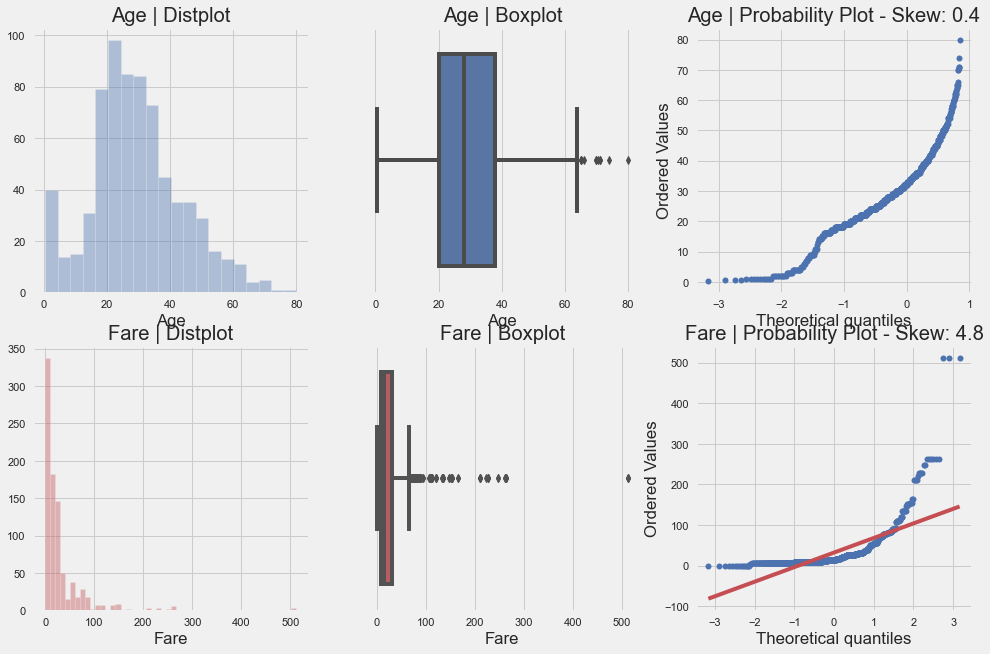

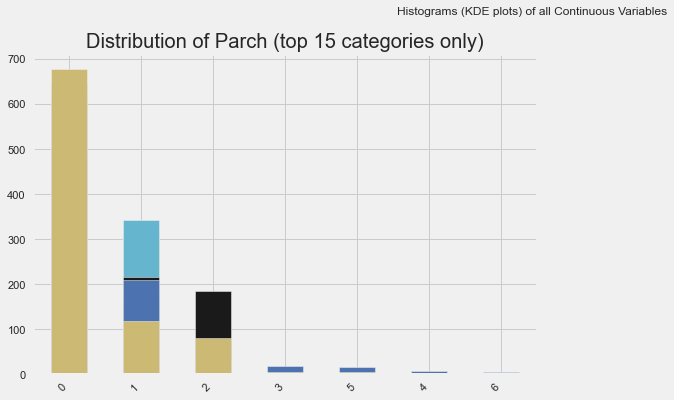

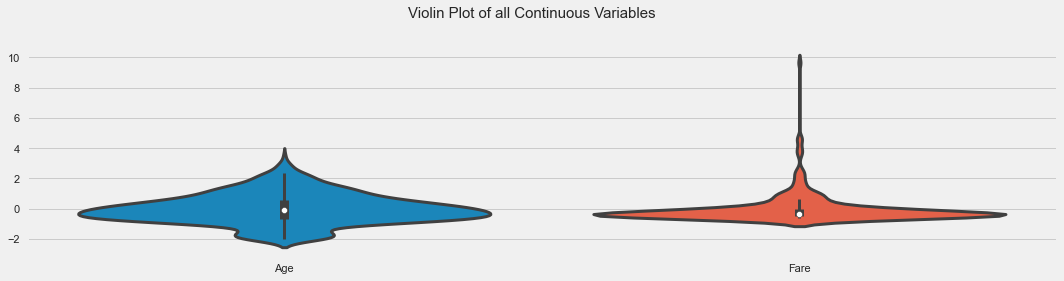

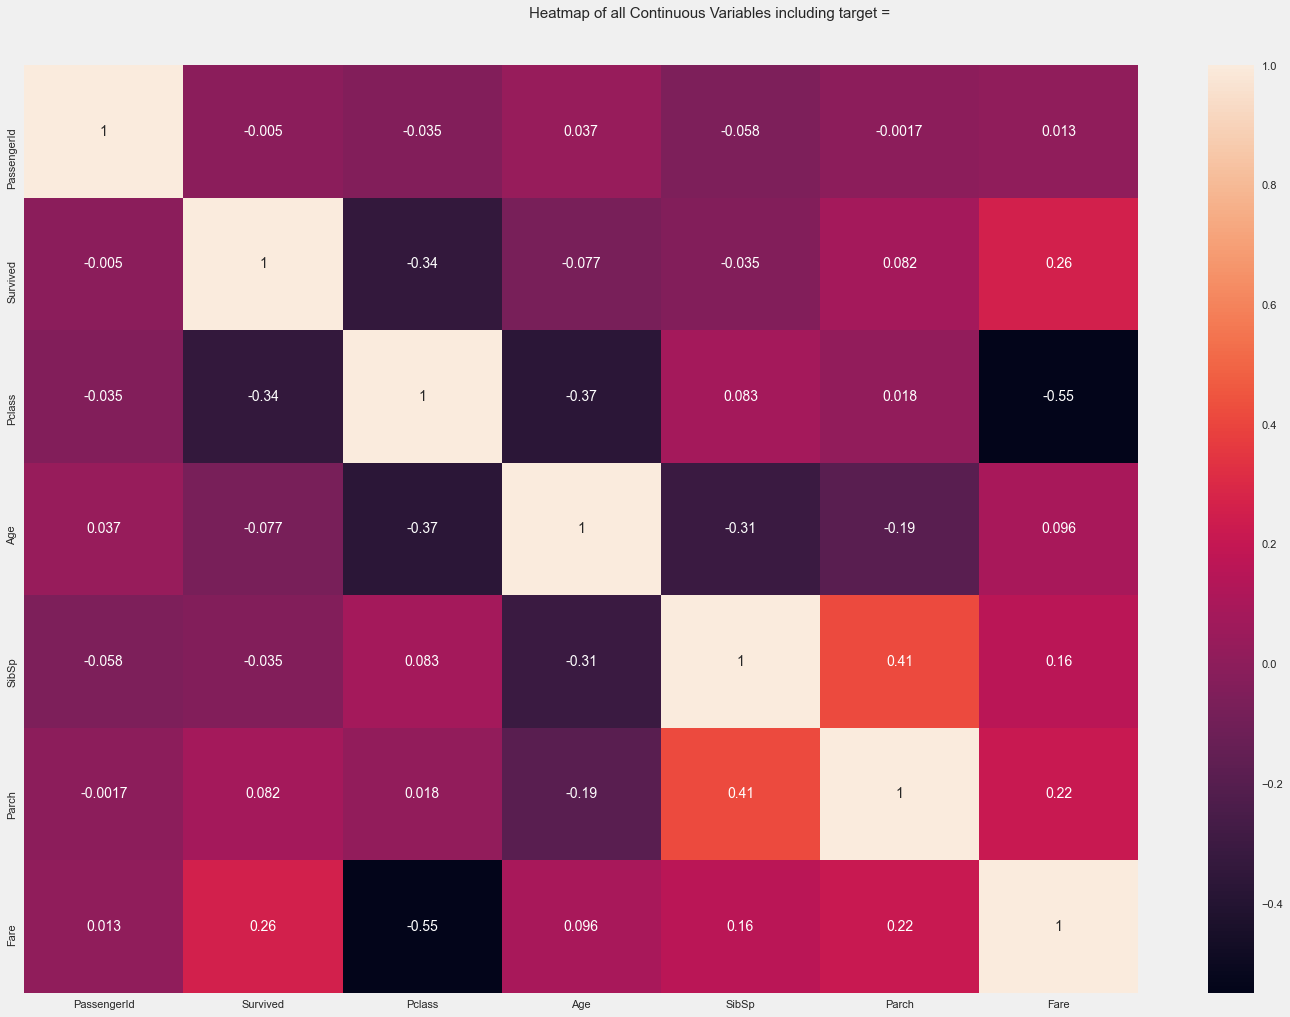

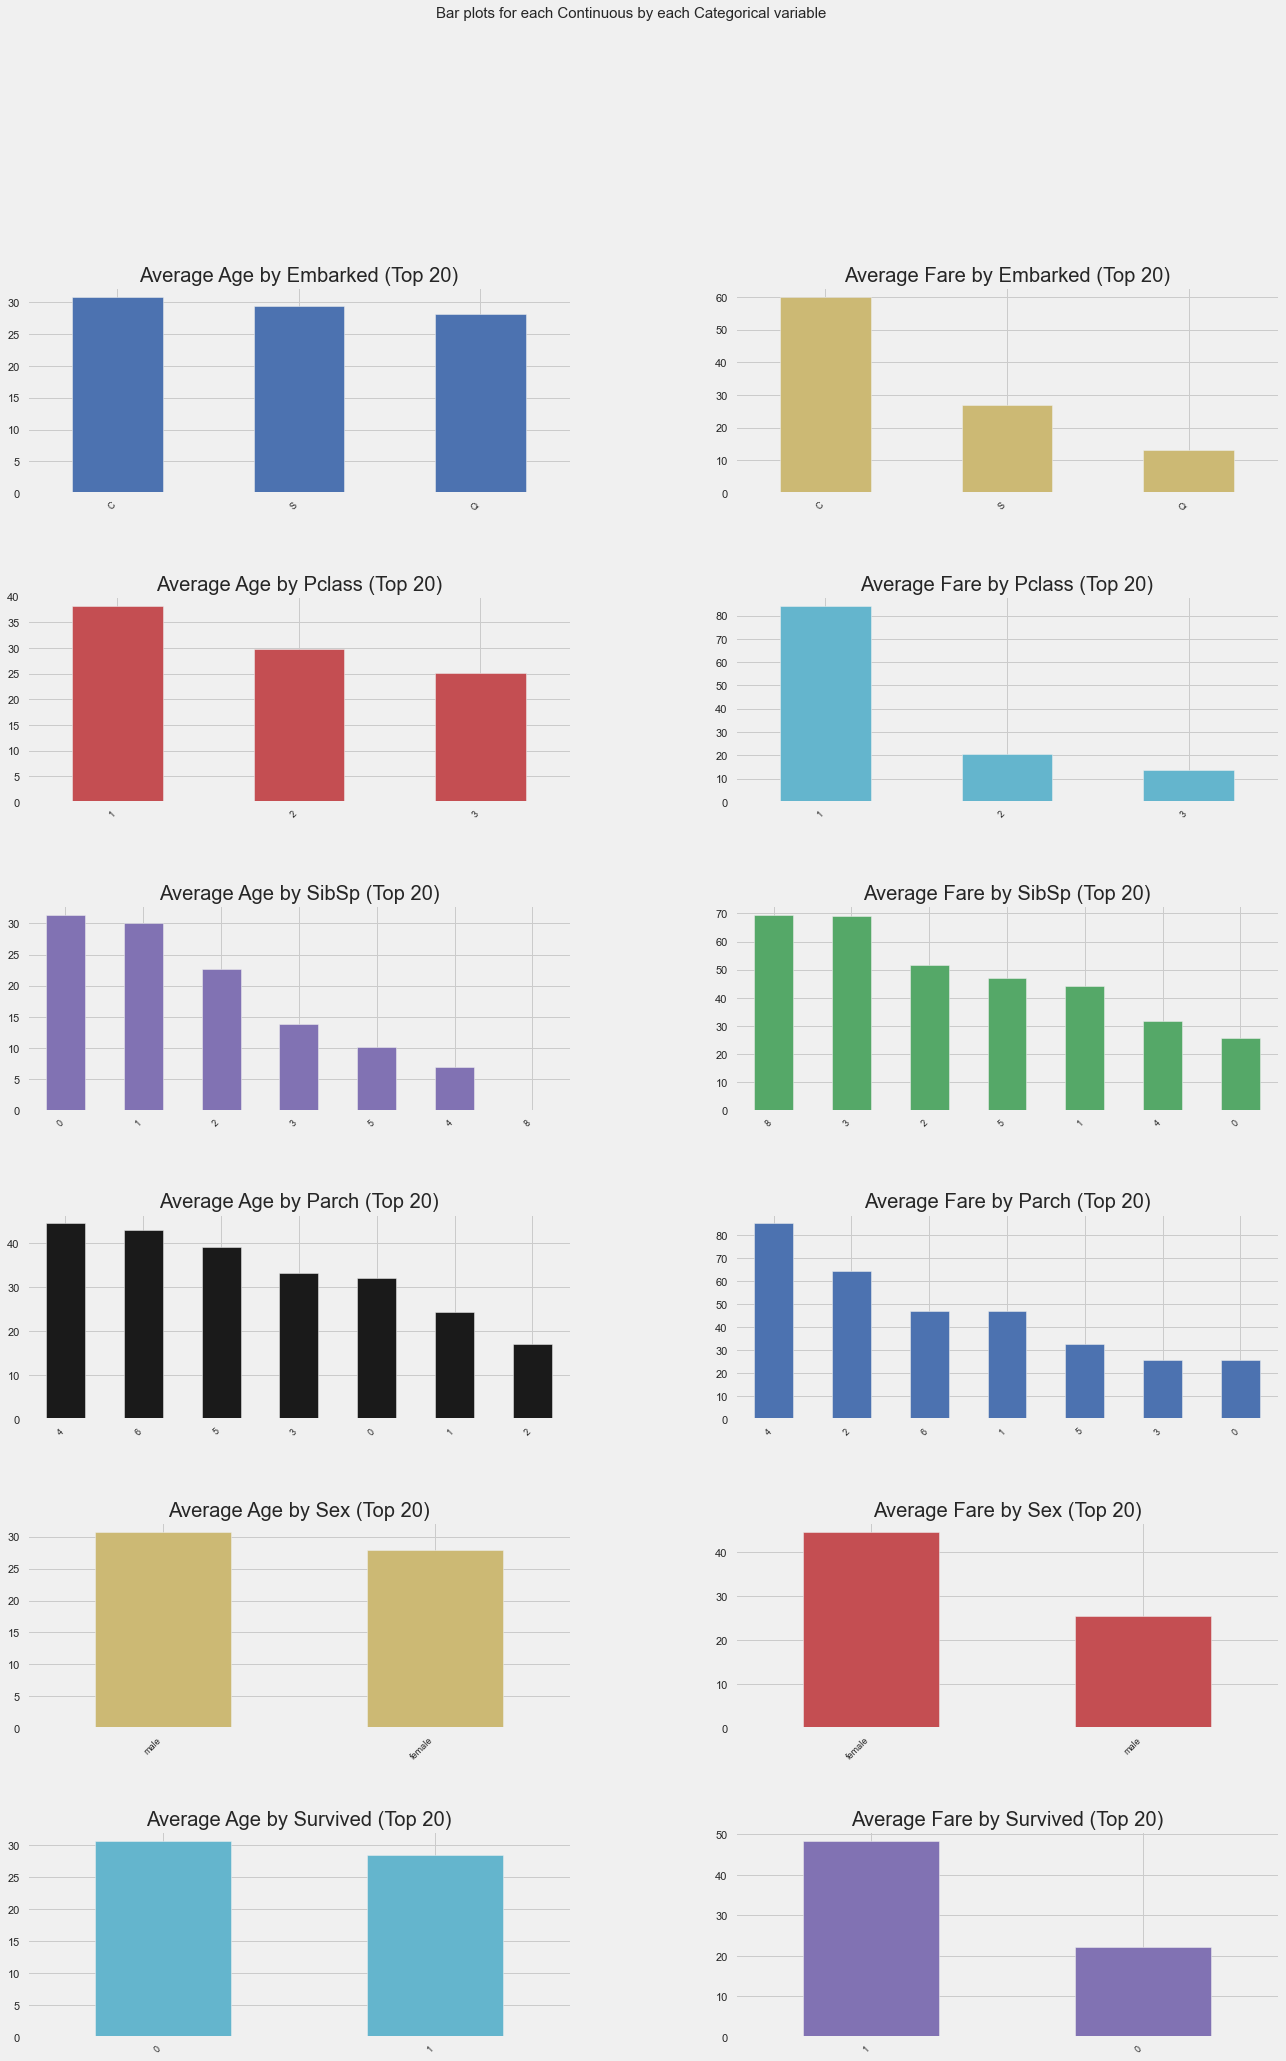

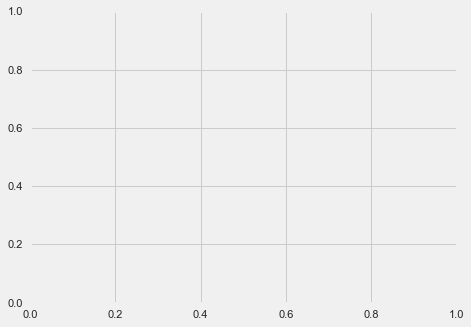

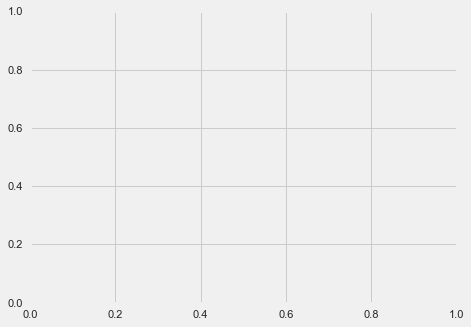

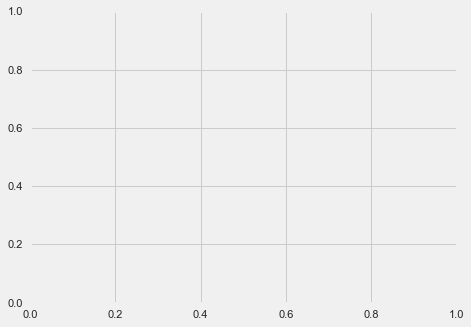

In [54]:
plt.figure(figsize = (10, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('C:/Users/Saad/Downloads/Titanic_Files/train.csv')
plt.show()

**Data pre-processing** <a id="pro"></a>

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.columns:
    if train[col].dtypes == 'object':
        train[col] = le.fit_transform(train[col])

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in test.columns:
    if test[col].dtypes == 'object':
        test[col] = le.fit_transform(test[col])

In [57]:
train.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.175690,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.060534,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719


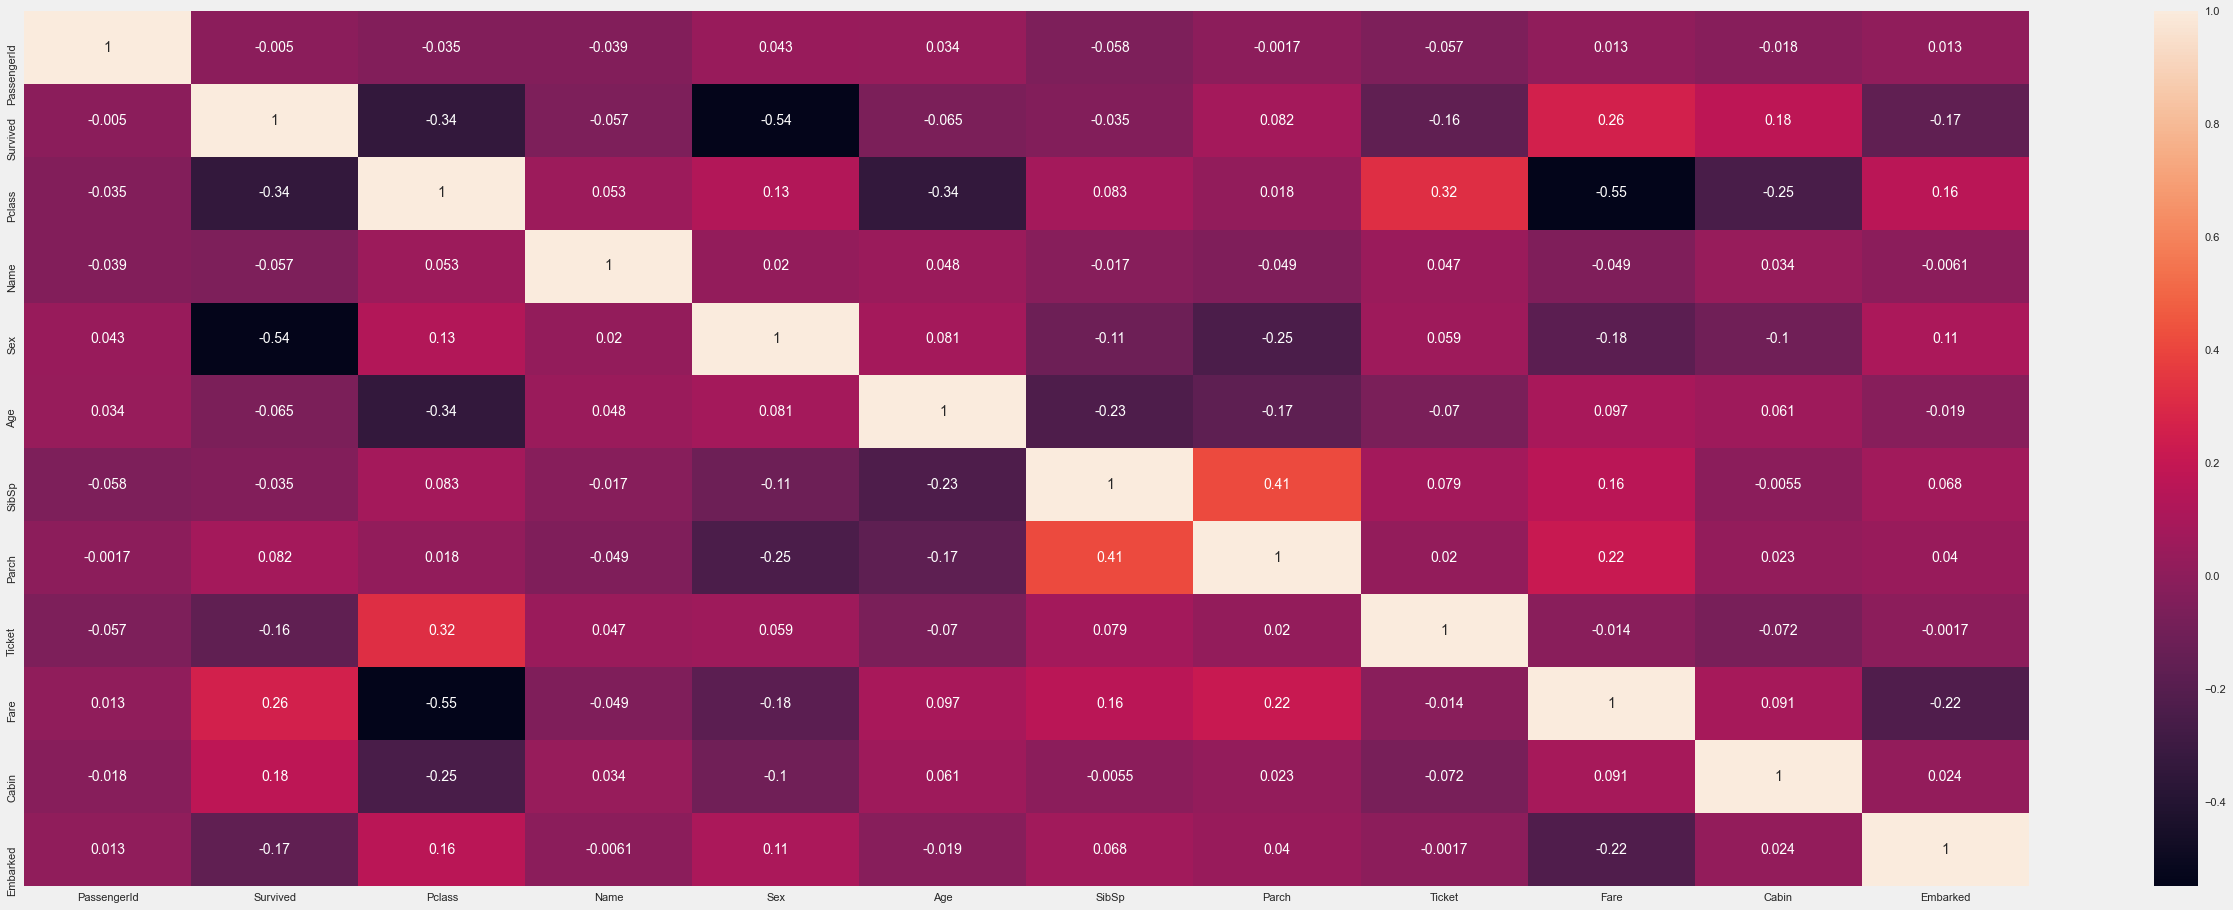

In [58]:
plt.figure(figsize=(40,15))
a=sns.heatmap(train.corr(),annot=True)

In [59]:
X=train.drop(['Survived'], axis=1)
y=train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 11), (179, 11), (712,), (179,))

In [60]:
decision_tree_model = DecisionTreeClassifier(random_state = 2)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
decision_tree_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", decision_tree_model_acc)

Accuracy: 76.53631284916202


In [61]:
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
random_forest_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", random_forest_model_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    4.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 78.77094972067039


[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.3s finished


In [62]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
NB_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", NB_model_acc)

Accuracy: 70.39106145251397


In [63]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", knn_model_acc)

Accuracy: 64.24581005586593


In [64]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
svm_model_acc = accuracy_score(y_pred, y_test) * 100
print("Accuracy:", svm_model_acc)

Accuracy: 67.59776536312849


In [65]:
all_models = pd.DataFrame({
    "Model" : ["Decision tree classifier", "Random forest classifier", "Naive Bayes classifier", "KNN", "SVM"],
    "Accuracy score" : [decision_tree_model_acc, random_forest_model_acc, NB_model_acc, knn_model_acc, svm_model_acc]
})
all_models.sort_values(by = "Accuracy score")

,Model,Accuracy score
3,KNN,64.245810
4,SVM,67.597765
2,Naive Bayes classifier,70.391061
0,Decision tree classifier,76.536313
1,Random forest classifier,78.770950


In [66]:
random_forest_model = RandomForestClassifier(criterion='gini',
                                            n_estimators=1750,
                                            max_depth=7,
                                            min_samples_split=6,
                                            min_samples_leaf=6,
                                            max_features='auto',
                                            verbose=1,
                                            random_state = 3)
random_forest_model.fit(X, y)
y_pred = random_forest_model.predict(test)
print("Accuracy:", random_forest_model_acc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 78.77094972067039


[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed:    0.3s finished


In [67]:
submission = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : y_pred
})
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


In [69]:
submission.to_csv('submission.csv', index = False)